In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt


**FILE**

In [3]:
net=gpd.read_file(r"C:\Users\metz_si\MyScripts\himemo\netzwerk\major_streets_prim_europe_junction\lines_border_NUTS_ID.shp")


In [6]:
net.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - LCC & LAEA
- bounds: (-35.58, 24.6, 44.83, 84.17)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
len(net)

2073106

In [8]:
net.head()

,osm_id,highway,oneway,junction,grenze,NUTS_ID,geom_len,geometry
0,73,primary,yes,None,0,UKI71,8,"LINESTRING (3618620.553 3215959.506, 3618623.9..."
1,74,primary,None,None,0,UKI71,18,"LINESTRING (3617413.294 3214941.334, 3617425.6..."
2,75,primary,None,None,0,UKI71,62,"LINESTRING (3618773.573 3216504.927, 3618765.8..."
3,79,primary,None,None,0,UKI71,674,"LINESTRING (3617008.948 3214480.394, 3617021.0..."
4,188,primary,yes,None,0,UKJ32,151,"LINESTRING (3522979.626 3150106.869, 3522984.4..."


In [9]:
net['country']=net.NUTS_ID.str[:2]

In [ ]:
net.head()

In [12]:
net.highway.value_counts()

primary           1061107
trunk              330312
motorway           260628
motorway_link      188371
trunk_link         134148
primary_link        98177
secondary             236
residential            60
secondary_link         21
unclassified           14
living_street           6
service                 5
tertiary                3
Name: highway, dtype: int64

In [13]:
net.highway.unique()

array(['primary', 'trunk', 'motorway_link', 'motorway', 'trunk_link',
       'primary_link', 'secondary', 'residential', 'unclassified',
       'tertiary', 'living_street', 'service', 'secondary_link', None],
      dtype=object)

In [16]:
relevant_highwaytypes=['primary', 'trunk', 'motorway_link', 'motorway', 'trunk_link', 'primary_link']
net=net[net.highway.isin(relevant_highwaytypes)].copy()

In [21]:
network_len=(net.groupby(['country','highway'])['geom_len'].sum()/1000).reset_index()

In [28]:
network_len.to_csv('network_len_perCountryHighway.csv', index=False)

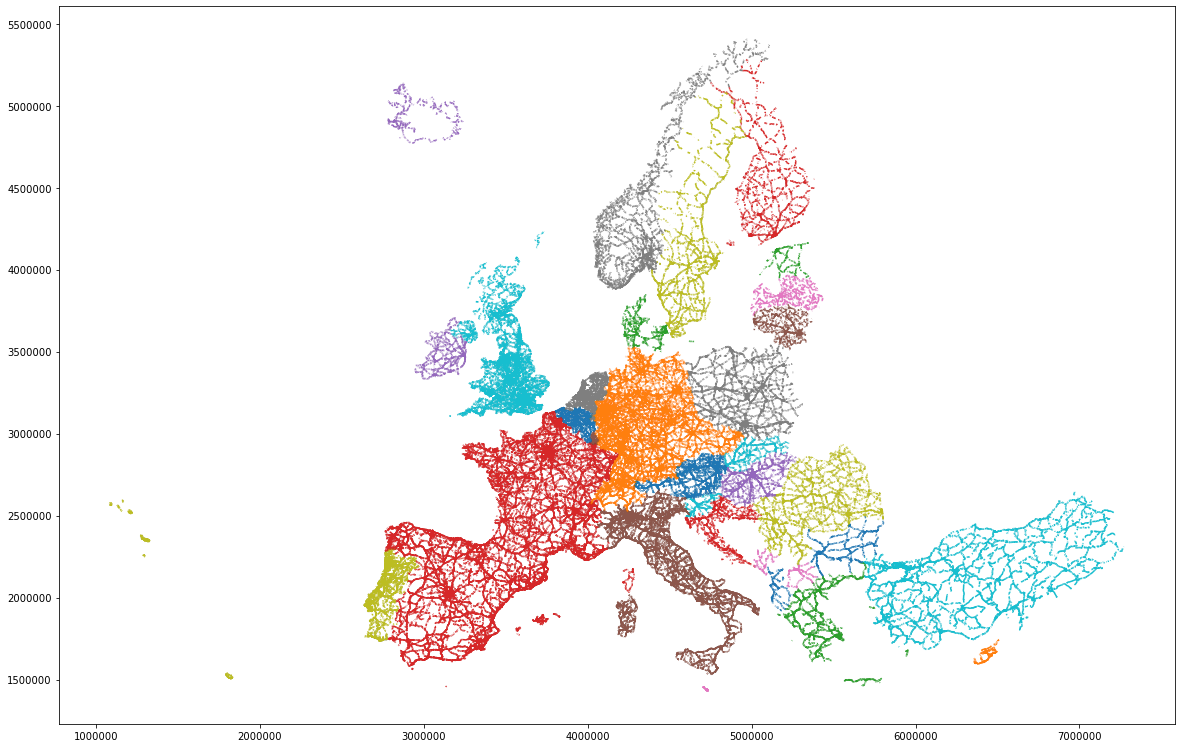

In [29]:
net[::2].plot(column='country', figsize=(20,20))